# 代码随想录 - 学习笔记 #

## 数组 ##

1. 数组理论基础
2. 二分查找
3. 移除元素
4. 有序数组的平方
5. 长度最小的子数组
6. 螺旋矩阵I
7. 区间和
8. 开发商购买土地
9. 总结篇

### 小tips记录 ###

1. 同时以两个元素为keys，优先以第一个元素的降序，并列时取第二个元素的升序

```python
# 原始列表
people = [[7, 0], [4, 4], [7, 1], [5, 0], [6, 1], [5, 2]]

# 方法一：使用 sorted 函数并指定多个排序键
people_sorted = sorted(people, key=lambda x: (-x[0], x[1]))

# 方法二：使用列表的 sort 方法进行原地排序
people.sort(key=lambda x: (-x[0], x[1]))
```

2. 数组收尾相连或成环的情况，可以考虑：
    - 使用取模来转圈寻值
    - 拼个一模一样的数组在后面

3. 列表拼接为字符串：`"".join([e for e in stack])`

### 查找和排序 ###

#### 二分查找 ####

- 排序数组，无重复元素
- while(left <= right)
- right = middle - 1

- 时间复杂度：O(log n)
- 空间复杂度：O(1)

In [ ]:
# leetcode 34 - 找左右边界
class Solution:
    def searchRange(self, nums: List[int], target: int) -> List[int]:
        def getRightBorder(nums:List[int], target:int) -> int:
            left, right = 0, len(nums)-1
            rightBoder = -2 # 记录一下rightBorder没有被赋值的情况
            while left <= right:
                middle = left + (right-left) // 2
                if nums[middle] > target:
                    right = middle - 1
                else: # 寻找右边界，nums[middle] == target的时候更新left
                    left = middle + 1
                    rightBoder = left
    
            return rightBoder
        
        def getLeftBorder(nums:List[int], target:int) -> int:
            left, right = 0, len(nums)-1 
            leftBoder = -2 # 记录一下leftBorder没有被赋值的情况
            while left <= right:
                middle = left + (right-left) // 2
                if nums[middle] >= target: #  寻找左边界，nums[middle] == target的时候更新right
                    right = middle - 1
                    leftBoder = right
                else:
                    left = middle + 1
            return leftBoder
        leftBoder = getLeftBorder(nums, target)
        rightBoder = getRightBorder(nums, target)
        # 情况一
        if leftBoder == -2 or rightBoder == -2: return [-1, -1]
        # 情况三
        if rightBoder -leftBoder >1: return [leftBoder + 1, rightBoder - 1]
        # 情况二
        return [-1, -1]

#### 快速排序 ####

#### 归并排序 ####

### 双指针 ###

#### 删除元素 - 双指针 ####

- 需要保证原地删除，O(1)空间复杂度
- 数组的元素在内存地址中是连续的，不能单独删除数组中的某个元素，只能覆盖
- 暴力解法：一层循环遍历数组，一层循环修改覆盖
- 双指针法（快慢指针）：
    - 快指针指向不包含删除元素的数组
    - 慢指针指向更新新数组的下标位置
- 时间复杂度：O(n)
- 空间复杂度：O(1)

In [ ]:
# leetcode 27
class Solution:
    def removeElement(self, nums: List[int], val: int) -> int:
        # 快慢指针
        fast = 0  # 快指针
        slow = 0  # 慢指针
        size = len(nums)
        while fast < size:  # 不加等于是因为，a = size 时，nums[a] 会越界
            # slow 用来收集不等于 val 的值，如果 fast 对应值不等于 val，则把它与 slow 替换
            if nums[fast] != val:
                nums[slow] = nums[fast]
                slow += 1
            fast += 1
        return slow

#### 有序数组的平方 - 双指针 ####

- 包含正负数的有序数组：数组平方的最大值就在数组的两端，不是最左边就是最右边，不可能是中间。
- 双指针法
- 时间复杂度：O(n)

In [ ]:
# leetcode 977
class Solution:
    def sortedSquares(self, nums: List[int]) -> List[int]:
        # fast pointer and slow pointer
        size = len(nums)
        left = 0
        right = size-1
        result = [0 for i in range(size)]

        # 最大绝对值的数在数组两侧，比较最左和最右，而后将output数组从后向前填充
        for i in range(size-1,-1,-1):
            if abs(nums[left]) > abs(nums[right]):
                result[i] = nums[left]**2
                left += 1
            else:
                result[i] = nums[right]**2
                right -= 1
        
        return result

#### 最大面积 ###

In [ ]:
# leetcode 11 -  盛最多水的容器
class Solution:
    def maxArea(self, height: List[int]) -> int:
        left = 0
        # 左右指针从两侧开始，逐渐逼近
        right = len(height)-1
        max_area = float("-inf")

        while left < right:
            max_area = max(max_area, (right-left)*min(height[left], height[right]))
            
            # 选择更矮一侧的指针进行移动（不能仅判断是否增长，因为可能在之后增长）
            if height[left] < height[right]:
                left += 1
            else:
                right -= 1

        return max_area

#### 三数之和 ###

- 三个指针：idx，left（idx+1），right（len-1）
    - 先排序数组
    - idx固定，sum大了减right，sum小了增left
    - 注意去重

In [ ]:
# leetcode 15 - 三数之和
class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        # sort the array to know the moving direction
        nums.sort()

        # iterate with three pointers (idx + left + right)
        result = []
        for i in range(len(nums)-2):
            # remember to skip the repeated elements
            if i>0 and nums[i]==nums[i-1]:
                continue

            left = i+1
            right = len(nums) - 1
            while left < right:
                # print(i, left, right)
                curr_sum = nums[left]+nums[right]+nums[i]
                if curr_sum < 0:
                    left += 1
                elif curr_sum > 0:
                    right -= 1
                elif curr_sum == 0:
                    result.append([nums[i], nums[left], nums[right]])
                    # remove the repeated left and right
                    while left<right and nums[left] == nums[left+1]:
                        left += 1
                    while left<right and nums[right] == nums[right-1]:
                        right -= 1
                    left += 1
                    right -= 1

        return result

### 滑动窗口 ###

#### 长度最小的子数组 - 滑动窗口 ####

- 滑动窗口：不断的调节子序列的起始位置和终止位置
    - 窗口：满足其和 ≥ s 的长度最小的 连续 子数组。
    - 窗口的起始位置如何移动：如果当前窗口的值大于等于s了，窗口就要向前移动了（也就是该缩小了）。
    - 窗口的结束位置如何移动：窗口的结束位置就是遍历数组的指针，也就是for循环里的索引。
- 时间复杂度：O(n)
- 空间复杂度：O(1)

In [ ]:
# leetcode 209
class Solution:
    def minSubArrayLen(self, target: int, nums: List[int]) -> int:
        size = len(nums)
        left = 0
        right = 0
        min_len = float('inf') # in case 0 always less than any positive integer
        sum_sub = 0

        while right < size:
            sum_sub += nums[right]
            while sum_sub >= target:
                min_len = min(min_len, right-left+1)
                sum_sub -= nums[left]
                left += 1
            right += 1
        
        if min_len == float('inf'):
            return 0
        else:
            return min_len

In [ ]:
# leetcode 3 - 无重复字符的最长子串
# 和双指针不同于：一直扩大右边界，遇到重复时，直接将左边界调整到上次出现值的下一位
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        # a dict that store the key(char) and value(last-time index of the char)
        table = dict()
        res = 0
        left = 0

        for right in range(len(s)):
            # keep adding the sliding window of the substring
            if s[right] not in table.keys() or table[s[right]] < left: # avoid removing back the left pointer
                res = max(res, right-left+1)
            # find the repeated element and reset the sliding window
            else:
                # update the left pointer to the next element of the start of these substring(sliding window)
                left = table[s[right]]+1
            # add current right char to dict
            table[s[right]] = right

        return res

### 前缀和 ###

- 特别适用于计算区间和
- 操作方法：
    - 计算前缀和（累加和）p[i]，而后计算部分区间累加和时，只需进行差值计算。
    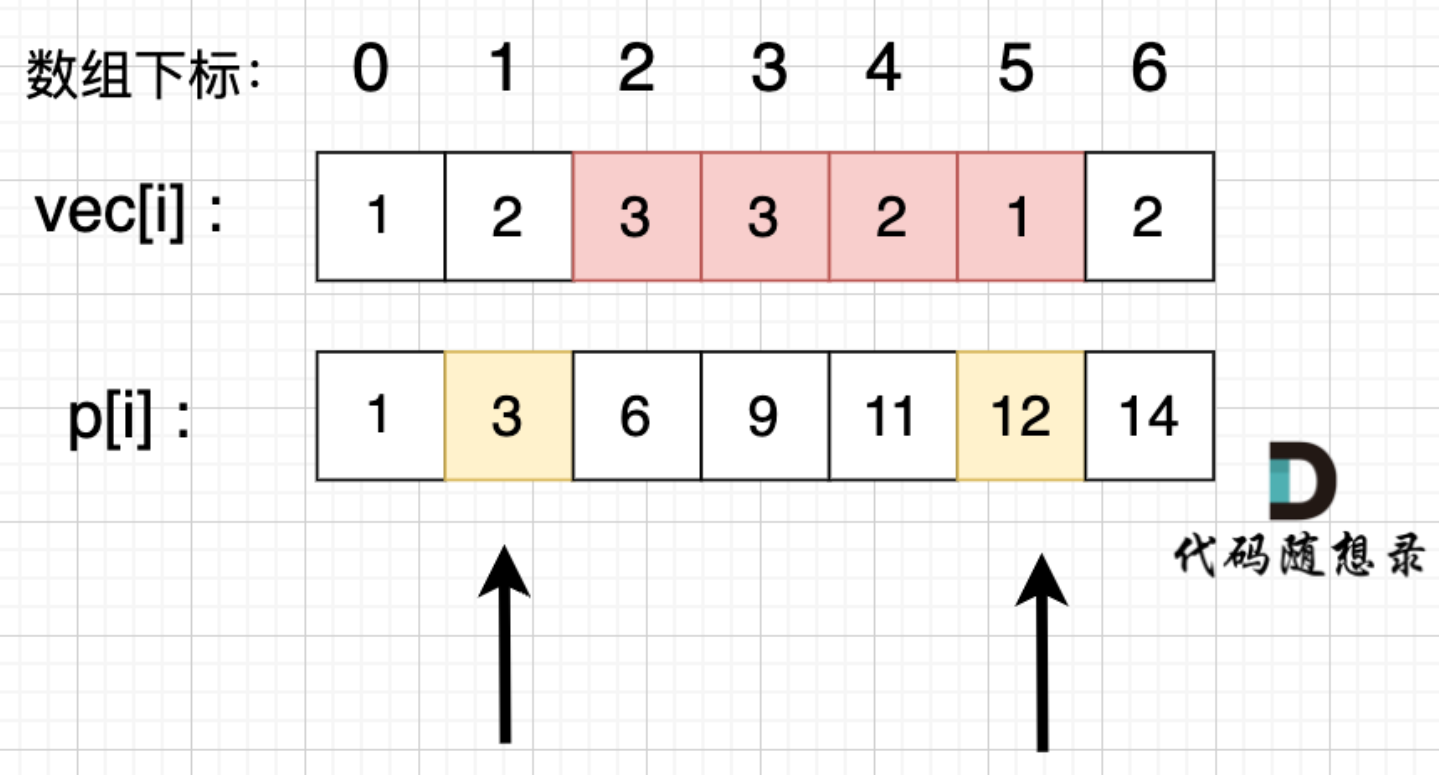

## 哈希表 ##

- 常用于快速判断一个元素是否出现集合里。
- 哈希原理：
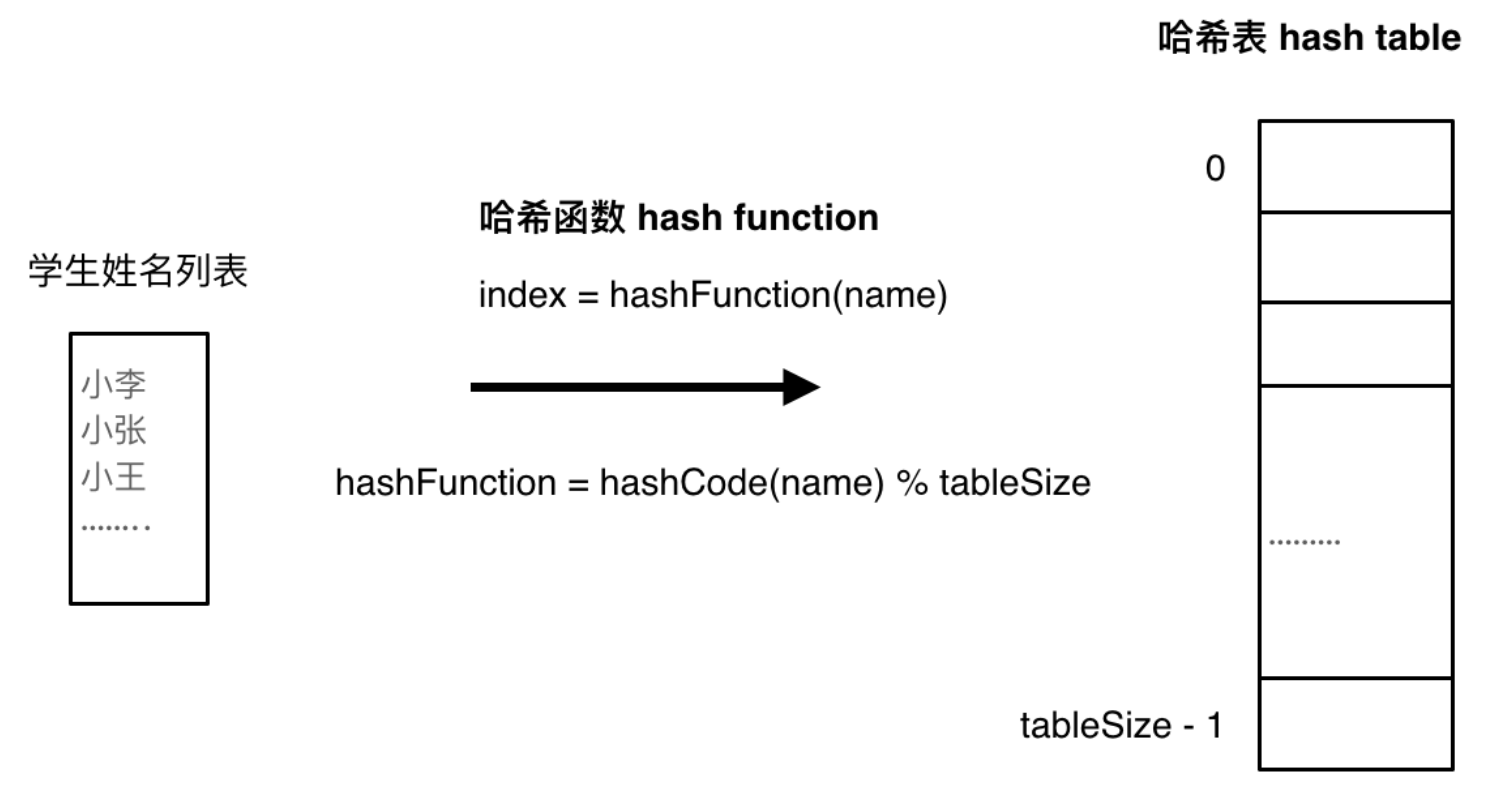
- 哈希碰撞：两个元素映射到同一位置，解决方案：
    - 拉链法：
    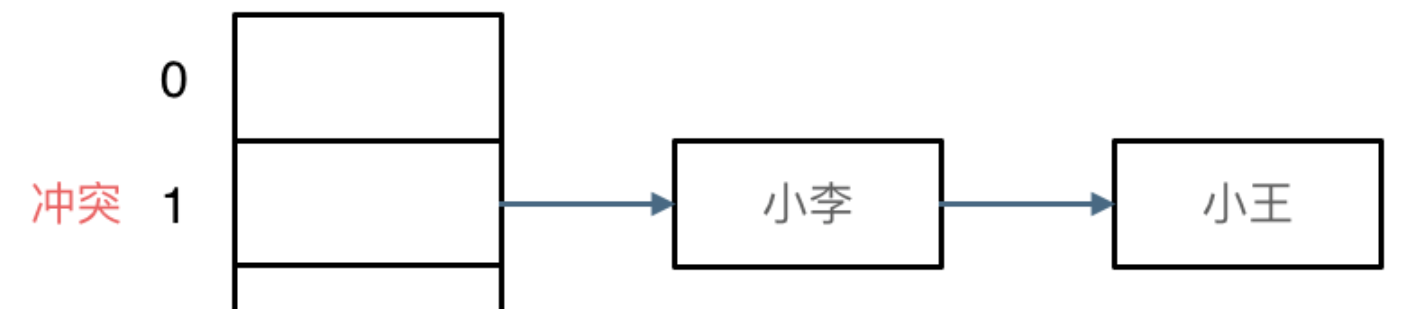
    - 线性探索法：
    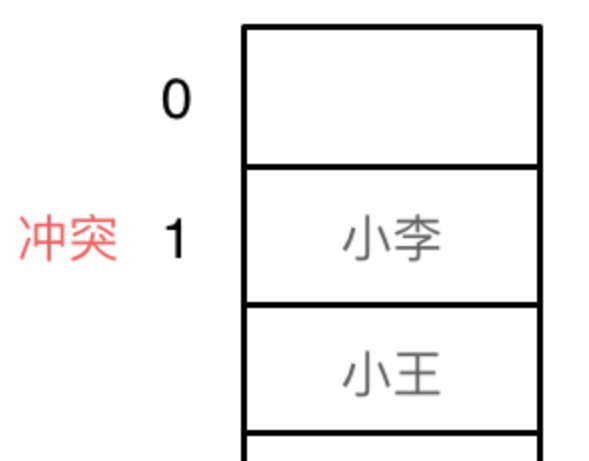



### 两数之和 ###

- 为什么用哈希:查询一个元素是否出现过，或者一个元素是否在集合里的时候，就要第一时间想到哈希法
- map用来做什么：存放已放问过的数和其index
- map中key和value分别表示什么：key存放数字，value存放index

- 时间复杂度: O(n)
- 空间复杂度: O(n)


In [ ]:
# leetcode 1 - 两数之和
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        # a dict to store the key(needed value) and value(its original index)
        table = dict()

        for i in range(len(nums)):
            current_val = nums[i]
            # if the needed value exists, return the indices; otherwise, add to the dict
            if current_val in table.keys():
                return [table[current_val],i]
            else:
                table[target-current_val] = i
                # print(target-current_val,table[target-current_val])

In [ ]:
# leetcode 242 - 有效的字母异位词
class Solution:
    def isAnagram(self, s: str, t: str) -> bool:
        letter_dict = defaultdict(int)

        for l in s:
            letter_dict[l] += 1

        for l in t:
            letter_dict[l] -= 1

        for count in letter_dict.values():
            if count!=0:
                return False

        return True

In [ ]:
# leetcode 350 - 两个数组的交集Ⅱ
class Solution:
    def intersect(self, nums1: List[int], nums2: List[int]) -> List[int]:
        dict1 = defaultdict(int)
        dict2 = defaultdict(int)
        res = []

        for n in nums1:
            dict1[n] += 1
        for n in nums2:
            dict2[n] += 1

        for n in dict1.keys():
            if n in dict2.keys():
                min_num = min(dict1[n], dict2[n])
                res += [n]*min_num
            # print(dict2)

        return res

## 字符串 ##

### 反转字符串 ###

In [ ]:
# leetcode 344 - 反转字符串
class Solution:
    def reverseString(self, s: List[str]) -> None:
        """
        Do not return anything, modify s in-place instead.
        """
        left, right =  0, len(s)-1

        while left < right:
            s[left], s[right] = s[right], s[left]
            left += 1
            right -= 1


In [ ]:
# leetcode 151 -  翻转字符串里的单词
class Solution:
    def reverseWords(self, s: str) -> str:
        words = s.strip().split()
        words = words[::-1] # reverse the list
        return " ".join([w for w in words]).strip()

### KMP算法 ###

In [ ]:
# TODO

## 链表 ##

- 数组在内存中需要连续存储，链表可以非连续分布
- 常见技巧：
    - 虚拟头节点（适用于改变链表结构时）
    - 快（2x）慢（1x）指针找中点
- 可结合双指针等方法进行特殊删除、翻转、查环等操作

- 添加/删除节点O(1), 删除第n个节点O(n)；查询O(n)
- 对比：数组插入/删除O(n),查询O(1)

1. 移除链表元素
2. 设计链表
3. 翻转链表
4. 两两交换链表中的节点
5. 删除链表的倒数第N个节点
6. 链表相交
7. 环形链表

In [ ]:
# 链表节点构造
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None

### 移除链表元素 ###

- 设置虚拟头节点
    - 从而删除头和删除其他结点的操作相同
    - 最后记得返回：虚拟头节点的下一个节点`return dummy.next`

- 时间复杂度：O(n)
- 空间复杂度：O(1)

In [ ]:
# leetcode 203
class Solution:
    def removeElements(self, head: Optional[ListNode], val: int) -> Optional[ListNode]:
        # set vitrual head node
        dummy_head = ListNode(next=head)

        # iterate the linked list and remove the elements
        curr = dummy_head
        while curr.next:
            # check the next one
            if curr.next.val == val:
                curr.next = curr.next.next
            else:
                curr = curr.next
        
        return dummy_head.next
        

### 设计链表 ###

- 注意：
    - 检测index是否超出长度
    - 维护一个size变量
- 时间复杂度: 涉及 index 的相关操作为 O(index), 其余为 O(1)
- 空间复杂度: O(n)


In [ ]:
# leetcode 707
class ListNode:
    def __init__(self, val, next_node=None):
        self.val = val
        self.next = next_node

class MyLinkedList:

    def __init__(self):
        self.dummy_head = ListNode(0)
        self.size = 0
        self.getSize()

    def get(self, index: int) -> int:
        if index < self.size:
            curr = self.dummy_head.next
            for i in range(index):
                curr = curr.next
            return curr.val
        else:
            return -1

    def addAtHead(self, val: int) -> None:
        new_node = ListNode(val)
        old_first_node = self.dummy_head.next
        self.dummy_head.next = new_node
        new_node.next = old_first_node
        self.size += 1

    def addAtTail(self, val: int) -> None:
        new_node = ListNode(val)
        curr = self.dummy_head
        while curr.next:
            curr = curr.next
        curr.next = new_node
        self.size += 1

    def addAtIndex(self, index: int, val: int) -> None:
        if index <= self.size:
            new_node = ListNode(val)
            curr = self.dummy_head
            for i in range(index): # find the previous one
                curr = curr.next
            next_node = curr.next
            curr.next = new_node
            new_node.next = next_node
            self.size += 1
        
    def deleteAtIndex(self, index: int) -> None:
        if index < self.size:
            curr = self.dummy_head
            for i in range(index): # find the previous one
                curr = curr.next
            target_node = curr.next
            next_node = target_node.next
            curr.next = next_node
            target_node.next = None
            self.size -= 1
    
    def getSize(self) -> int:
        count = 0
        curr = self.dummy_head
        while curr.next:
            curr = curr.next
            count += 1
        self.size = count


# Your MyLinkedList object will be instantiated and called as such:
# obj = MyLinkedList()
# param_1 = obj.get(index)
# obj.addAtHead(val)
# obj.addAtTail(val)
# obj.addAtIndex(index,val)
# obj.deleteAtIndex(index)

### 翻转链表 ###

- 记得头节点也需要改变方向，因此设置prev最开始为None，curr为头节点
- 先改变next节点，防止循环
- 时间复杂度: O(n)
- 空间复杂度: O(1)


In [ ]:
# leetcode 206

# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def reverseList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if not head or not head.next:
            return head
        
        # 3 pointers to reverse the link direction, curr is the changing one
        prev_node = None
        curr = head

        while curr:
            next_node = curr.next
            curr.next = prev_node
            prev_node = curr
            curr = next_node
        
        return prev_node

### 环形链表 ###

- 双指针（快慢指针）+ 超级智慧的数学公式推导
    - 快指针一次走两步，满指针一次走一步，迟早遇到
    - 根据公式推算，遇到时的点往前继续一直走的点数（index 1） = head出发往前走的点数（index 2）
- 注意：不是所有给定的都存在环，因此需要遍历fast和fast.next来确保无环情况不陷入死循环
- 时间复杂度: O(n)，快慢指针相遇前，指针走的次数小于链表长度，快慢指针相遇后，两个index指针走的次数也小于链表长度，总体为走的次数小于 2n
- 空间复杂度: O(1)


In [ ]:
# leetcode 142
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, x):
#         self.val = x
#         self.next = None

class Solution:
    def detectCycle(self, head: Optional[ListNode]) -> Optional[ListNode]:
        # two pointers + math
        slow = head
        fast = head
        
        while fast and fast.next: # there exist no cycle case, so could check slow==fast
            slow = slow.next
            fast = fast.next.next
            
            if slow == fast:
                joint = fast # index 1
                start = head # index 2
                while joint != start:
                    joint = joint.next
                    start = start.next

                return joint

        return None

### 链表排序 ###

1. base case：返回头节点
2. 快慢指针找中点并分割
3. 分别sort递归left，right链表
4. 在新建链表中合并left和right链表，记得剩余全部补齐
5. 返回新链表头节点


- 快慢指针其他应用：
    1. 倒数第 K 个结点
    2. 中间结点
    3. 是否存在环

In [ ]:
# leetcode 148 -  排序链表
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def sortList(self, head: Optional[ListNode]) -> Optional[ListNode]:
        # 1. base case
        if not head or not head.next:
            return head

        # 2. divide the linkedlist (w. slow and fast pointers)
        slow = head
        fast = head.next
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next
        mid = slow.next # need to be slow.next cause we want to cut down from mid-1
        slow.next = None # split two linkedlists

        # 3. recursively solve left and right
        left = self.sortList(head)
        right = self.sortList(mid)

        # 4. merge left and right to a new linkedlist
        dummy = ListNode(0)
        curr = dummy
        while left and right:
            if left.val < right.val:
                curr.next = left
                left = left.next
            else:
                curr.next = right
                right = right.next
            curr = curr.next
        curr.next = left or right

        # 5. return head node
        return dummy.next

## 动态规划 ##

- 动态规划四要素：
    - 定义一维or二维dp数组含义
    - 状态转移方程
    - 初始化边界
    - 遍历顺序

In [ ]:
# leetcode 70
class Solution:
    def climbStairs(self, n: int) -> int:
        dp = [0 for i in range(n+1)]
        dp[1] = 1
        if n > 1 :
            dp[2] = 2
        
        for i in range(3,n+1):
            # every step can either climb 1 or 2, so only have 2 choices each step
            dp[i] = dp[i-1] + dp[i-2]

        return dp[n]

### 不同路径 ###

- 动态规划四要素：
    - 定义一维or二维dp数组含义：dp[i][j] - 到(i,j)的路径条数
    - 状态转移方程：dp[i][j] = dp[i][j-1]+dp[i-1][j]（只能往下或往右）
    - 初始化边界：dp[i][0] = 1 and dp[0][j] = 1 最上面和最左边贴边两列的路径都只可能有一条
    - 遍历顺序：左上到右下

    - 特殊情况 1 - 有障碍：
        - 状态转移方程：仅在（i，j）非障碍的情况下：dp[i][j] = dp[i][j-1]+dp[i-1][j]，如遇障碍则跳过保持其为0
        - 初始化边界：dp[i][0] = 1 and dp[0][j] = 1， 但若遇到障碍，则之后均为0（因为无法触达）
    - 特殊情况 2 - 有权重：
        - 定义一维or二维dp数组含义：dp[i][j] - 到(i,j)的最优（最大/最小）权重
        - 状态转移方程：dp[i][j] = min/max(dp[i][j-1]+dp[i-1][j])+grid[i][j]，找最大值


- 时间复杂度：O(m*n)
- 空间复杂度：O(m*n)

In [ ]:
# leetcode 62
class Solution:
    def uniquePaths(self, m: int, n: int) -> int:
        # create dp and initialize row 0 and column 0
        dp = [[1 for j in range(m)] for i in range(n)]
        
        # calculate all other cells
        for i in range(1,n):
            for j in range(1,m):
                dp[i][j] = dp[i][j-1] + dp[i-1][j]
        
        return dp[n-1][m-1]

In [ ]:
# leetcode 63 - 有障碍
class Solution:
    def uniquePathsWithObstacles(self, obstacleGrid: List[List[int]]) -> int:
        m = len(obstacleGrid[0])
        n = len(obstacleGrid)
        dp = [[0 for j in range(m)] for i in range(n)]
        
        for i in range(n):
            print(i, obstacleGrid[i][0])
            if obstacleGrid[i][0] == 1:
                break
            dp[i][0] = 1
            
        for j in range(m):
            print(j, obstacleGrid[0][j])
            if obstacleGrid[0][j] == 1:
                break
            dp[0][j] = 1
    
        for i in range(1, n): # skip the leftest and topest line
            for j in range(1, m):
                if obstacleGrid[i][j] == 0:
                    dp[i][j] = dp[i-1][j] + dp[i][j-1]
                else:
                    dp[i][j] = 0
        # print(grid)
        
        return dp[n-1][m-1]

In [ ]:
# leetcode 64 - 有权重
class Solution:
    def minPathSum(self, grid: List[List[int]]) -> int:
        # create dp and initialize row 0 and column 0
        m = len(grid[0])
        n = len(grid)
        dp = [[0 for j in range(m)] for i in range(n)]
        dp[0][0] = grid[0][0]

        for i in range(1,n):
            dp[i][0] = dp[i-1][0]+grid[i][0]
            
        for j in range(1,m):
            dp[0][j] = dp[0][j-1]+grid[0][j]
        
        # calculate all other cells
        for i in range(1,n):
            for j in range(1,m):
                dp[i][j] = min(dp[i-1][j], dp[i][j-1])+grid[i][j]
        
        return dp[n-1][m-1]

### 01背包理论 ###


In [ ]:
# TODO

### 买卖股票的最佳时机 ###

- 动态规划四要素：
    - 定义一维or二维dp数组含义: dp[i][0]-第i天持有股票的现金数 dp[i][1]-第i天不持有股票的现金数
    - 状态转移方程：
        - dp[i][0]-持有花费（求min）：
            1. 前一天已持有：dp[i-1][0]
            2. 当天买入：price[i]
        - dp[i][1]-不持有获得（求max）：
            1. 一直不持有：dp[i-1][1]
            2. 当天卖出：dp[i-1][0]-price[i]
    - 初始化边界: dp[0][0]=price[0]持有则第一天已买入时的花费, dp[0][1]=0不持有则第一天也不持有的获得
    - 遍历顺序：自上而下

    - 特殊情况 1：多次买卖
        - dp[i][0]-持有花费（求min）：在此时，同时需要加上过往盈利所得，以便于计算总体最优，即 prices[i]-dp[i-1][1]
    - 特殊情况 2：2~k次买卖
        - dp数组：2~k组第i天持有股票的现金数和不持有股票的现金数，如两组时，dp[i][0], dp[i][1], dp[i][2], dp[i][3]
        - dp[i][0]-持有花费（求min）：在此时，同时需要加上过往盈利所得，以便于计算总体最优，即 prices[i]-dp[i-1][1]


In [ ]:
# leetcode 121- 单次买卖
class Solution:
    def maxProfit(self, prices):
        n = len(prices)
        dp = [[0,0] for i in range(n)]
        # column 0 = hold stock; column 1 = doesn't hold stock
        dp[0][0] = prices[0]
        dp[0][1] = 0

        for i in range(1,n):
            # already hold it or buy it today
            dp[i][0] = min(dp[i-1][0], prices[i]) 
            # has hold it at all or sell it today
            dp[i][1] = max(dp[i-1][1], prices[i]-dp[i-1][0])

        return dp[n-1][1]

In [ ]:
# leetcode 122 - 多次买卖
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        n = len(prices)
        dp = [[0,0] for i in range(n)]
        # column 0 = hold stock; column 1 = doesn't hold stock
        dp[0][0] = prices[0]
        dp[0][1] = 0

        for i in range(1,n):
            # already hold it or buy it today with the previous maximum 
            dp[i][0] = min(dp[i-1][0], prices[i]-dp[i-1][1]) # main difference!
            # has hold it at all or sell it today
            dp[i][1] = max(dp[i-1][1], prices[i]-dp[i-1][0])
            # print(i, dp)

        return dp[n-1][1]

### 整数拆分

- 动态规划四要素：
    - 定义一维or二维dp数组含义：dp[i] - 拆解数字i得到的最大乘积（题目求n，则此时以此看2~n）
    - 状态转移方程：dp[i] = max(dp[i], max((i-j)*j, dp[i-j]*j)) 此时j为0~i
        - dp[i]:直接它本身
        - (i-j)*j：拆为两个数i-j与j
        -  dp[i-j]*j：拆为两个以上，dp[i-j]为（i-j）时最优拆法所得乘积
    - 初始化边界：0与1没有拆解意义，所以可以直接从2开始
    - 遍历顺序：自小至大

- 时间复杂度：O(n)
- 空间复杂度：O(n)

In [ ]:
# leetcode 343
class Solution:
    def integerBreak(self, n: int) -> int:
        dp = [0 for i in range(n+1)]
        dp[0] = 1
        dp[1] = 1
        
        for i in range(2,n+1):
            for j in range(1,i):
                dp[i] = max(dp[i], (i-j)*j, dp[i-j]*j)

        return dp[n]

### 最长递增子序列 ###

- 动态规划四要素：
    - 定义一维or二维dp数组含义：dp[i] - 当前整数构成序列情况下最长子序列
    - 状态转移方程：dp[i] = max(dp[i], dp[j]+1) 此时j为0~i
        - dp[i]:直接它本身
        -  dp[j]：nums[j]比nums[i]小，才能构成子序列
    - 初始化边界：dp[0] == 1 因为无论如何有一个元素在序列中
    - 遍历顺序：从左至右
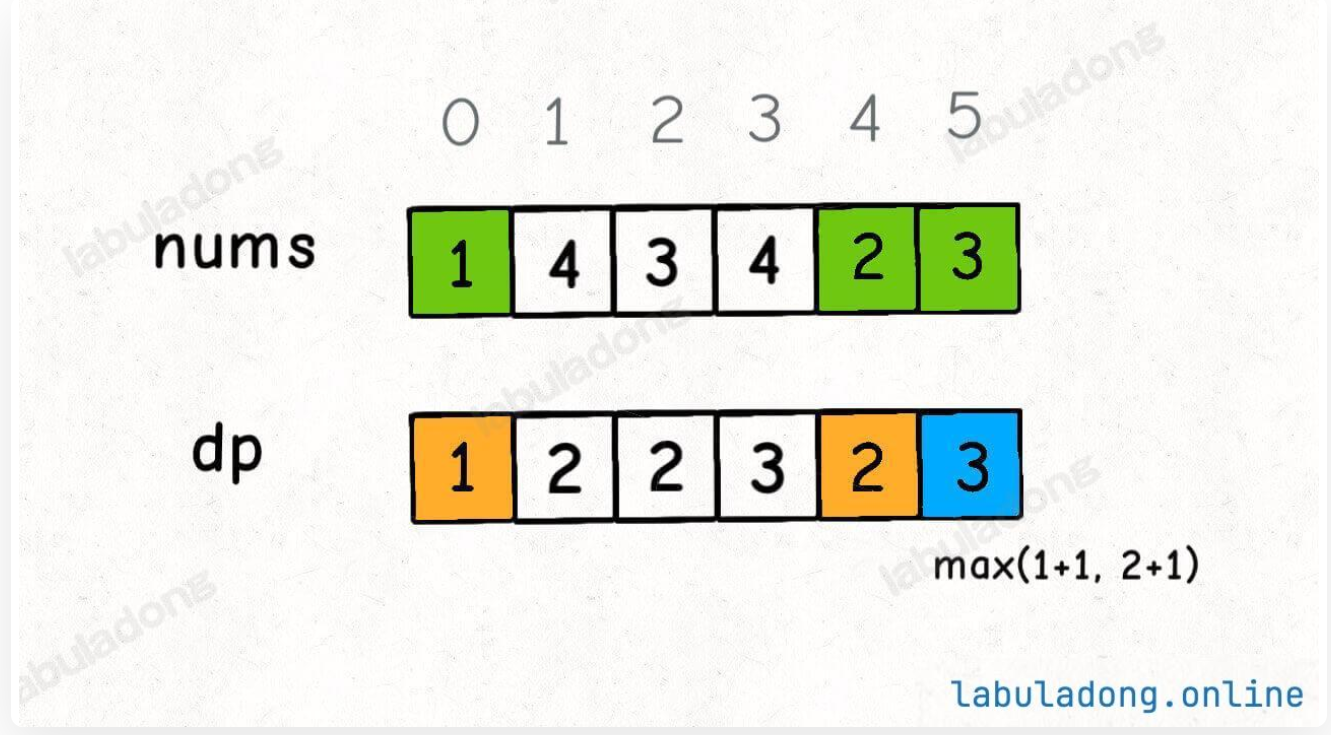

- 时间复杂度：O(n^2)

In [ ]:
# leetcode 300 - 最长递增子序列
class Solution:
    def lengthOfLIS(self, nums: List[int]) -> int:
        dp = [1] * len(nums)
        
        for i in range(1, len(dp)):
            for j in range(i):
                if nums[j] < nums[i]:
                    dp[i] = max(dp[j]+1, dp[i])
        
        return max(dp)

In [ ]:
# leetcode 1218 - 最长定差子序列
class Solution:
    def longestSubsequence(self, arr: List[int], difference: int) -> int:
        # store the current number with its number of the longest subsequence
        dp = defaultdict(int)
        
        # if exist the prior number that matches the condition, add one as the length for the sub
        for a in arr:
            dp[a] = dp[a-difference] + 1
        
        return max(dp.values())

## 栈与队列 ##

- 队列是先进先出FIFO，栈是先进后出LIFO
- 栈提供push,pop,top等接口（均为O(1)）;不提供走访功能，也不提供迭代器(iterator)。
- 栈的底层实现可以是vector，deque，list。
- 栈非常适用于括号匹配、去重、问题；队列适用于滑动窗口最大值、前K个高频元素。


- 问题：栈里面的元素在内存中是连续分布的么？
    - 这个问题有两个陷阱：
        - 陷阱1：栈是容器适配器，底层容器使用不同的容器，导致栈内数据在内存中不一定是连续分布的。
        - 陷阱2：缺省情况下，默认底层容器是deque，那么deque在内存中的数据分布是什么样的呢？ 答案是：不连续的，下文也会提到deque。


### 用栈实现队列 ###

- 时间复杂度: push和empty为O(1), pop和peek为O(n)
- 空间复杂度: O(n)

In [ ]:
# leetcode 232
class MyQueue:

    def __init__(self):
        self.queue = []

    def push(self, x: int) -> None:
        self.queue.append(x)

    def pop(self) -> int:
        if len(self.queue) > 0:
            return self.queue.pop(0)

    def peek(self) -> int:
        if len(self.queue) > 0:
            return self.queue[0]
        

    def empty(self) -> bool:
        if len(self.queue) > 0:
            return False
        else:
            return True


# Your MyQueue object will be instantiated and called as such:
# obj = MyQueue()
# obj.push(x)
# param_2 = obj.pop()
# param_3 = obj.peek()
# param_4 = obj.empty()

### 用队列实现栈 ###

- 时间复杂度: pop和top为O(n)，其他为O(1)
- 空间复杂度: O(n)

In [ ]:
# leetcode 225
class MyStack:

    def __init__(self):
        self.stack = []

    def push(self, x: int) -> None:
        self.stack.append(x)
        print(self.stack)

    def pop(self) -> int:
        if len(self.stack)==0:
            return None
        else:
            last = self.stack[-1]
            self.stack = self.stack[:-1]
            return last

    def top(self) -> int:
        if len(self.stack) > 0:
            return self.stack[-1]

    def empty(self) -> bool:
        if len(self.stack) > 0:
            return False
        else:
            return True


# Your MyStack object will be instantiated and called as such:
# obj = MyStack()
# obj.push(x)
# param_2 = obj.pop()
# param_3 = obj.top()
# param_4 = obj.empty()

### 有效的括号

- 栈非常适合做匹配类题目
- 不匹配的三种情况：
    1. 第一种情况，字符串里左方向的括号多余了，所以不匹配。
    2. 第二种情况，括号没有多余，但是 括号的类型没有匹配上。
    3. 第三种情况，字符串里右方向的括号多余了，所以不匹配。
- 实现方法：
    - 每匹配到一个左侧符号，在栈中push一个相应的右侧符号
    - 每匹配到一个右侧符号，在栈中pop一个相同的右侧符号；若匹配至错误对象或无匹配可pop对象，return False
    - 如果循环结束，stack中仍有元素，return False


- 时间复杂度: O(n)
- 空间复杂度: O(n)

In [ ]:
# leetcode 20
class Solution:
    def isValid(self, s: str) -> bool:
        left_parenthese = ["{", "[", "("]
        right_parenthese = ["}", "]", ")"]
        stack = []
        
        for i in s:
            if i in left_parenthese: # left parenthese and push onto the stack
                stack.append(i) 
            elif i in right_parenthese: # right parenthese are verified to be the same as the left-side
                right_idx = right_parenthese.index(i)
                if len(stack) == 0 or left_parenthese[right_idx] != stack[len(stack)-1]: # if the same, pop from the stack; otherwise, return false
                    return False
                else:
                    stack.pop()
            # continue parsing the input until it both stacks empty
        
        if len(stack) != 0:
            return False
        
        return True

### 删除字符串中的所有相邻重复项

- 对对碰：相邻且重复，则此时栈顶与即将加入的元素相同时即对碰掉；若无相同则入栈

- 时间复杂度: O(n)
- 空间复杂度: O(n)

In [ ]:
# leetcode 1047
class Solution:
    def removeDuplicates(self, s: str) -> str:
        stack = []

        for e in s:
            if len(stack)>0 and stack[-1]==e:
                stack.pop()
            else:
                stack.append(e)
        
        return "".join([e for e in stack])

### 前K个高频元素/单词

- 题目涉及三块：
    1. 要统计元素出现频率 - map统计
    2. 对频率排序 - 优先级队列
    3. 找出前K个高频元素

- 涉及两种解法：
    1. 使用字典，而后反向按频率为key，将元素append进去，最后排序key
    2. 使用字典+顶堆（优先级队列）
- 缺省情况下priority_queue利用max-heap（大顶堆）完成对元素的排序，这个大顶堆是以vector为表现形式的complete binary tree（完全二叉树）。
- 堆是一棵完全二叉树，树中每个结点的值都不小于（或不大于）其左右孩子的值。 如果父亲结点是大于等于左右孩子就是大顶堆，小于等于左右孩子就是小顶堆。

In [ ]:
# leetcode 692
from collections import defaultdict, List
class Solution:
    def topKFrequent(self, words: List[str], k: int) -> List[str]:
        word_dict = defaultdict(int)
        res = []

        for w in words:
            word_dict[w] += 1
        
        freq_dict = defaultdict(list)
        for key, value in word_dict.items():
            freq_dict[value].append(key)
        
        sorted_key = sorted(freq_dict.keys()) # from lowest to highest
        count = 0
        while count<k:
            key = sorted_key.pop() # output in-reverse
            values = sorted(freq_dict[key], reverse=True) # reverse lexicographical order 
            while count<k and values:
                res.append(values.pop()) # output in-reverse
                count += 1
        # print(res)

        return res


## 单调栈 ##

- 常见使用情况：通常是一维数组，要寻找任一个元素的右边或者左边第一个比自己大或者小的元素的位置，时间复杂度O(n)

- 主要有三个判断条件:
    - 当前遍历的元素T[i]小于栈顶元素T[st.top()]的情况
    - 当前遍历的元素T[i]等于栈顶元素T[st.top()]的情况
    - 当前遍历的元素T[i]大于栈顶元素T[st.top()]的情况

In [ ]:
# leetcode 739 - 每日温度
class Solution:
    def dailyTemperatures(self, temperatures: List[int]) -> List[int]:
        # initialize stack and result array
        result = [0 for i in range(len(temperatures))] # initalize with all 0
        stack = [0] # push the first one's index (to calculate location)

        for i in range(1, len(temperatures)):
            # case 1&2: incoming element <= stack.top
            if temperatures[i] <= temperatures[stack[-1]]:
                stack.append(i)

            # case 3: incoming element > stack.top
            else:
                while len(stack) > 0 and temperatures[i] > temperatures[stack[-1]]:
                    result[stack[-1]] = i - stack[-1]
                    stack.pop()
                stack.append(i) # push after popping all smaller
            
        return result

## 二叉树 ##

- 知识点
    - 二叉树的种类：
        - 满二叉树：只有度为0的结点和度为2的结点，并且度为0的结点在同一层上；也可以说深度为k，有2^k-1个节点的二叉树。
        - 完全二叉树：在完全二叉树中，除了最底层节点可能没填满外，其余每层节点数都达到最大值，并且最下面一层的节点都集中在该层最左边的若干位置。若最底层为第 h 层（h从1开始），则该层包含 1~ 2^(h-1) 个节点。
        - 二叉搜索树：二叉搜索树是一个有序树。
            - 若它的左子树不空，则左子树上所有结点的值均小于它的根结点的值；
            - 若它的右子树不空，则右子树上所有结点的值均大于它的根结点的值；
            - 它的左、右子树也分别为二叉排序树
        - 平衡二叉搜索树（AVL）：它是一棵空树或它的左右两个子树的高度差的绝对值不超过1，并且左右两个子树都是一棵平衡二叉树。
    - 二叉树的存储方式：
        - 二叉树可以链式存储（用指针），也可以顺序存储（用数组）。
            - 如果父节点的数组下标是 i，那么它的左孩子就是i*2+1，右孩子就是i*2+2。
    - 二叉树的遍历方式：
        - 深度优先遍历（可记为中间结点的遍历位置） - 栈+递归实现
            - 前序遍历：中左右
            - 中序遍历：左中右
            - 后序遍历：左右中
            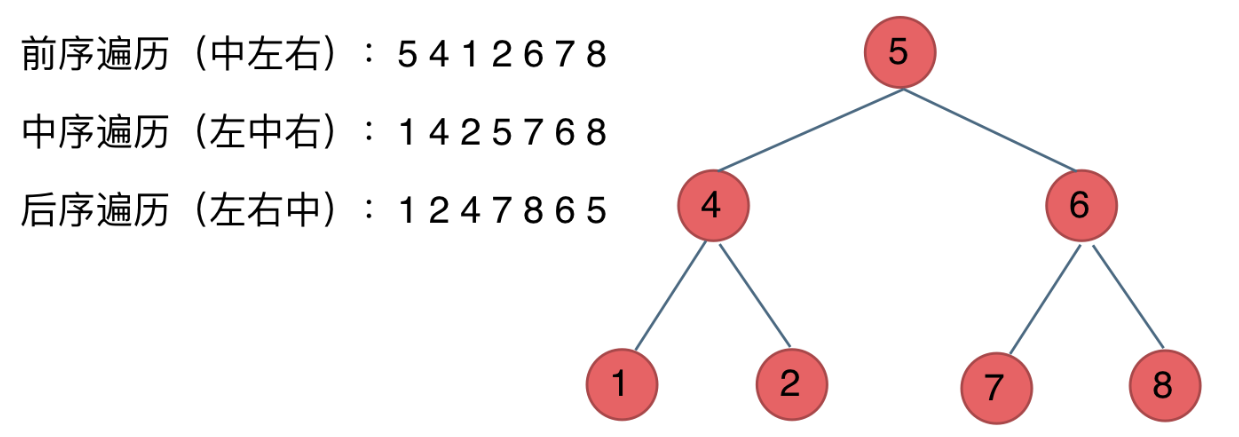
        - 广度优先遍历 - 队列实现
        

### 二叉树递归遍历（DFS） ###

- 深度优先遍历（可记为中间结点的遍历位置）
    - 前序遍历：中左右
    - 中序遍历：左中右
    - 后序遍历：左右中

- 递归三要素：
    - 递归函数的参数和返回值：确定哪些参数是递归的过程中需要处理的，那么就在递归函数里加上这个参数， 并且还要明确每次递归的返回值是什么进而确定递归函数的返回类型。
    - 终止条件：写完了递归算法, 运行的时候，经常会遇到栈溢出的错误，就是没写终止条件或者终止条件写的不对，操作系统也是用一个栈的结构来保存每一层递归的信息，如果递归没有终止，操作系统的内存栈必然就会溢出。
    - 单层递归的逻辑：确定每一层递归需要处理的信息。在这里也就会重复调用自己来实现递归的过程。

- 例如 - 前序：
    - 递归函数的参数和返回值：因为需要打印，所以传入存放节点的list；返回值为空
    - 终止条件：当层遍历为空即结束
    - 单层递归的逻辑：前序先取中间点，再取左子树，再右子树
- 中序与后序仅递归顺序不同

- 变式：
    - 验证二叉搜索树：用中序遍历输出后，检查数组是否每个后一个大于前一个

- 时间复杂度：O(n) - 根据master formula,其中a = 2, b = 2, d = 0：$$T(N) = a*T(N / b) + O (N^d)$$
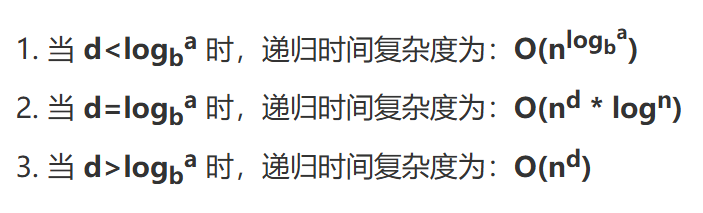
- 空间复杂度：O(n)

In [ ]:
# leetcode 94 - 中序遍历
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def inorderTraversal(self, root: Optional[TreeNode]) -> List[int]:
        def dfs(node):
            # edge case: return when going through empty value
            if node is None:
                return 
            # left
            dfs(node.left)
            # middle
            res.append(node.val)
            # right
            dfs(node.right)

        res = []
        dfs(root)
        return res

In [3]:
# leetcode 98 - 验证二叉树

### 二叉树层序遍历（BFS） ###


- 广度优先遍历 - 队列实现
    - 队列先进先出，符合一层一层遍历的逻辑，而用栈先进后出适合模拟深度优先遍历也就是递归的逻辑。
    - 先将头节点加入queue，而后遍历queue所有节点：
        - 每次pop最左所有节点加入该层level的list
            - 将当前节点的左右子节点加入queue

- 变式：
    - 二叉树的右视图（leetcode 199）：完全相同的方法，仅改变最后存入result list的值，仅存每层level最后一个元素
    - 最大深度：同样方法，求levels层数
    - 最小深度：第一次遇到左右子节点均空时，则为最小深度，即`if not node.left and not node.right: return depth`
    - 翻转二叉树：queue中一层一层node pop出后转换左右子节点：`node.left, node.right = node.right, node.left`

In [ ]:
# leetcode 102 - 层序遍历（BFS）

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def levelOrder(self, root: Optional[TreeNode]) -> List[List[int]]:
        # define queue, level_list
        if not root:
            return []
        queue = deque([root])
        levels = []

        # iterate queue
        while queue:
            level = []
            # since each round will pop a node, so use length to track
            for _ in range(len(queue)):
                curr = queue.popleft()
                level.append(curr.val)
                if curr.left:
                    queue.append(curr.left)
                if curr.right:
                    queue.append(curr.right)
            
            levels.append(level)

        return levels

### 从前序/中序/后序（三选二）遍历序列构造二叉树 ###

- 给定前序和中序，分别迭代切割数组再递归：
    1. 前序：第一个节点必定为当前root
    2. 中序：先找当前root所在位置，而后，前半段为root.left，后半段为root.right
    3. 再回到前序：根据中序中已知left和right的长度切分前序数组
- 给定中序和后序，分别迭代切割数组再递归：
    1. 后序：最后一个节点必定为当前root
    2. 中序：先找当前root所在位置，而后，前半段为root.left，后半段为root.right
    3. 再回到后序：根据中序中已知left和right的长度切分后序数组
- 图示为中序和后序情况

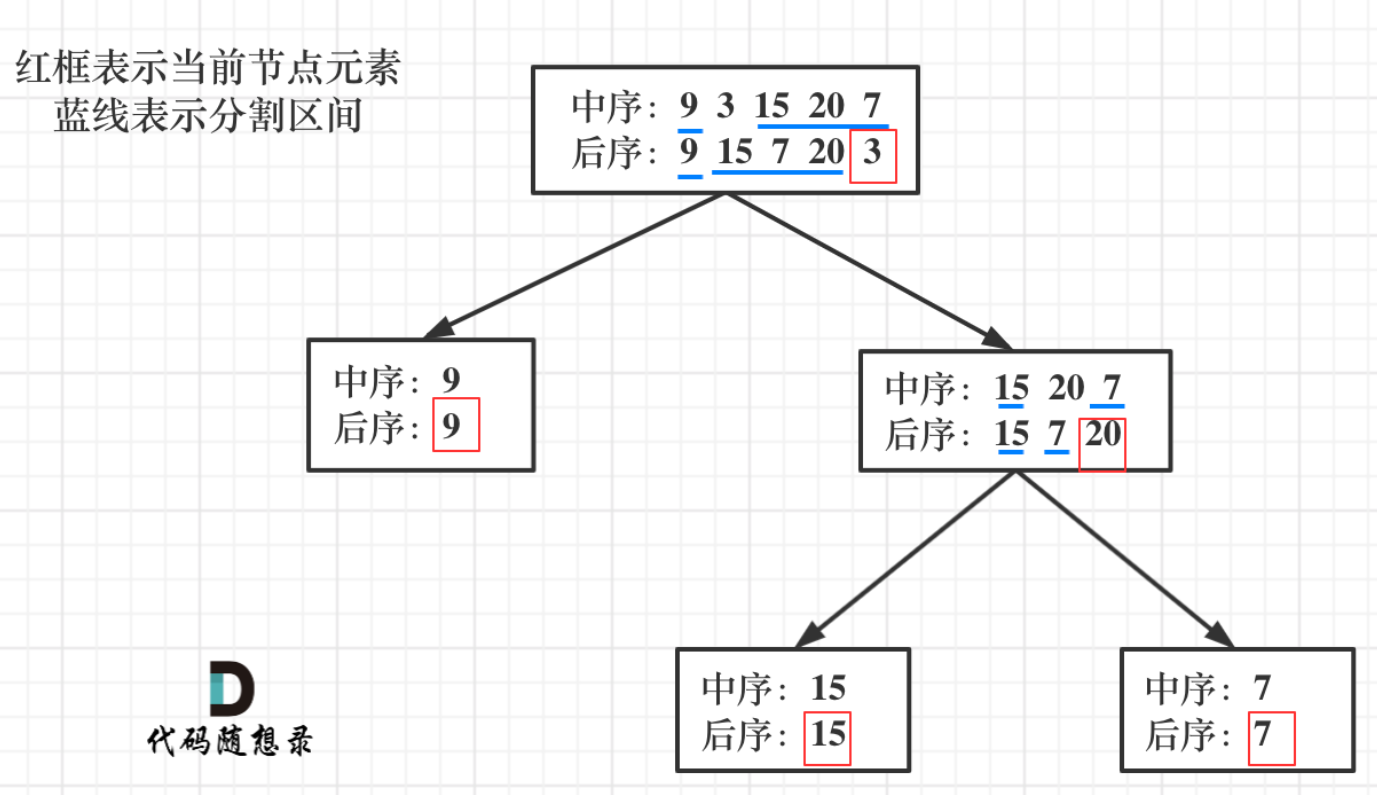

In [ ]:
# leetcode 105 - 给定前序中序构造树
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def buildTree(self, preorder: List[int], inorder: List[int]) -> Optional[TreeNode]:
        # edge case:
        if not preorder:
            return None
        
        # preorder - find current root
        root_val = preorder[0]
        root = TreeNode(root_val)

        # inorder - use current root to find root.left and root.right
        root_idx = inorder.index(root_val)
        left_inorder = inorder[:root_idx]
        right_inorder = inorder[root_idx+1:] # don't set as [root_idx+1: -1]

        # preorder - use lenght of root.left and root.right to find in the preorder
        left_len = len(left_inorder)
        left_preorder = preorder[1:left_len+1]
        right_preorder = preorder[left_len+1:]

        # recursively build tree on left and right
        root.left = self.buildTree(left_preorder, left_inorder)
        root.right = self.buildTree(right_preorder, right_inorder)
        
        # return root
        return root

## 回溯 ##

- 回溯是递归的副产品，只要有递归就会有回溯。
- 回溯并不高效，因为本质是穷举。
- 回溯法解决的问题都可以抽象为树形结构，因为解决的都是在集合中递归查找子集，集合的大小就构成了树的宽度，递归的深度就构成了树的深度。
- 回溯常见问题类型：
    - 组合问题：N个数里面按一定规则找出k个数的集合
    - 切割问题：一个字符串按一定规则有几种切割方式
    - 子集问题：一个N个数的集合里有多少符合条件的子集
    - 排列问题：N个数按一定规则全排列，有几种排列方式
    - 棋盘问题：N皇后，解数独等等

&nbsp;
- 回溯三部曲：
    - 递归函数的返回值以及参数
    - 回溯函数终止条件
    - 单层搜索的过程
    
&nbsp;
- 回溯模板：
```python
void backtracking(参数) {
    if (终止条件) {
        存放结果;
        return;
    }

    for (选择：本层集合中元素（树中节点孩子的数量就是集合的大小）) {
        处理节点;
        backtracking(路径，选择列表); // 递归
        回溯，撤销处理结果
    }
}

```

### 组合问题 ###

- 一般来说：组合问题和排列问题是在树形结构的叶子节点上收集结果，而子集问题就是取树上所有节点的结果。
&nbsp;
- 回溯三部曲：
    - 递归函数的返回值以及参数:
        - path: 暂存当前结果
        - result：全部结果
        - startIndex：由于不能重复，所以需要知晓当前开始节点；若为可重复情况，则无需
    - 回溯函数终止条件：当path已符合k长度即可
    - 单层搜索的过程：遍历所有元素（可剪枝优化：将限制范围改为到n-path.size()+1）
&nbsp;
- 时间复杂度: O(n * 2^n)【最坏情况，可看作子集问题，2^n种状态，每个需要O(n)时间构造】
- 空间复杂度: O(n)

- 变式：
    1. 组合之和Ⅱ (leetcode216)：限制总和相加为n
        - 解法：几乎相同的步骤，在终止时仅允许相加之和符合的append入result
        - 剪枝优化：在回溯之前进行总和相加，超过数值的之间return
    2. 组合之和 (leetcode39)：在给定数组中选择数字，限制总和相加为n，取数可重复
        - 解法：与上相比，因为可重复，进入回溯时的startIndex不需要+1
    3. 电话号码的组合：
        - 解法：index为当前letter在digits的位置，s为暂存当前结果的字符串
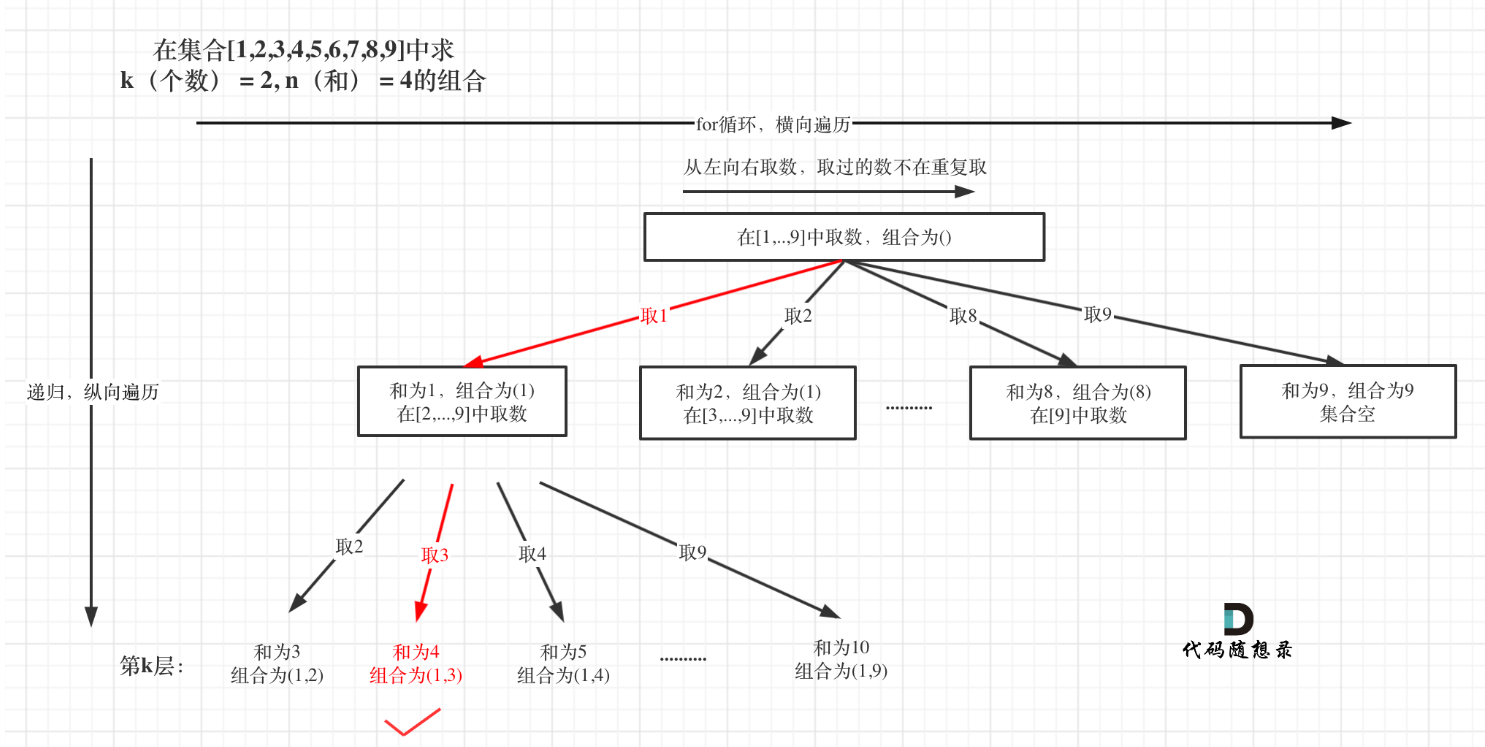

In [ ]:
# leetcode 77 - 组合
class Solution:
    def combine(self, n: int, k: int) -> List[List[int]]:
        def backtracking(n, k, startIndex, path, result):
            """
                startIndex: current node
                path: store a single match result
                result: store all match results
            """
            # return case: reach the leaf node (path exist k nodes)
            if len(path) == k:
                result.append(path[:]) # path[:] = path.copy()
                # print(path)
                return
            # recursively solve all nodes
            for i in range(startIndex, n+1):
                path.append(i)
                backtracking(n, k, i+1, path, result)
                path.pop() # backtrack the current node

        result = []
        backtracking(n,k,1, [], result) # startIndex start from 1 is based on question statement
        return result

In [ ]:
# leetcode 39 - 组合总和
class Solution:
    def combinationSum(self, candidates: List[int], target: int) -> List[List[int]]:
        def backtracking(candidates,target, startIndex, path, result):

            if sum(path) == target: # only add those match to the result
                result.append(path[:])
                return

            for i in range(startIndex, len(candidates)):
                path.append(candidates[i])
                # if the sum already exceed n, no need to further proceed
                if sum(path)<=target:
                    backtracking(candidates, target, i, path, result)
                path.pop()

        result = []
        backtracking(candidates, target, 0, [], result)
        return result

In [ ]:
# leetcode 216 - 组合总和Ⅲ
class Solution:
    def combinationSum(self, candidates: List[int], target: int) -> List[List[int]]:
        def backtracking(candidates,target, startIndex, path, result):

            if sum(path) == target: # only add those match to the result
                result.append(path[:])
                return

            for i in range(startIndex, len(candidates)):
                path.append(candidates[i])
                # if the sum already exceed n, no need to further proceed
                if sum(path)<=target:
                    backtracking(candidates, target, i, path, result)
                path.pop()

        result = []
        backtracking(candidates, target, 0, [], result)
        return result

In [ ]:
# leetcode 40 - 组合总和Ⅱ
class Solution:
    def combinationSum2(self, candidates: List[int], target: int) -> List[List[int]]:
        def backtracking(candidates, used, target, startIndex, path, result):

            if sum(path) == target: # only add those match to the result
                result.append(path[:])
                return

            for i in range(startIndex, len(candidates)):
                # for the same number, only use the first number 
                if i > startIndex and candidates[i] == candidates[i-1] and not used[i-1]:
                    continue 
                if sum(path) > target:
                    break

                path.append(candidates[i])
                # if the sum already exceed n, no need to further proceed
                used[i] = True
                backtracking(candidates, used, target, i+1, path, result)
                used[i] = False
                path.pop()      

        result = []
        used = [False] * len(candidates)
        candidates.sort()
        backtracking(candidates, used, target, 0, [], result)
        return result

In [ ]:
# leetcode 17 - 电话号码的字母组合
class Solution:
    def letterCombinations(self, digits: str) -> List[str]:
        letter_map = {
            "2": "abc",
            "3": "def",
            "4": "ghi",
            "5": "jkl",
            "6": "mno",
            "7": "pqrs",
            "8": "tuv",
            "9": "wxyz"
        }

        def backtracking(digits, index, s, result):
            """
                index: the index of the current letter in digits
                s: current string
                result: store all strings
            """
            if index == len(digits):
                result.append(s)
                print(result)
                return
            
            possible_letters = letter_map[digits[index]]
            for l in possible_letters:
                s += l
                backtracking(digits, index+1, s, result)
                s = s[:-1]
        
        if not digits:
            return []

        result = []
        backtracking(digits, 0, "", result)
        return result


### 切割问题 ###

- 切割问题可以抽象为树型结构
- 回溯三部曲（以leetcode93：复原IP地址为例）：
    - 递归参数：在原输入、暂存结果和所有结果基础上，还需要start_idx记录下一次递归分割的起始位置和coma_num记录逗号数量
    - 递归终止条件：本题只要求氛围四段，所以coma数量为3时终止，再检验第4段是否有效
    - 单层搜索的逻辑：[start_idx, i]即为截取子串，判断该子串是否合法，合法即添加"."，不合法就剪枝
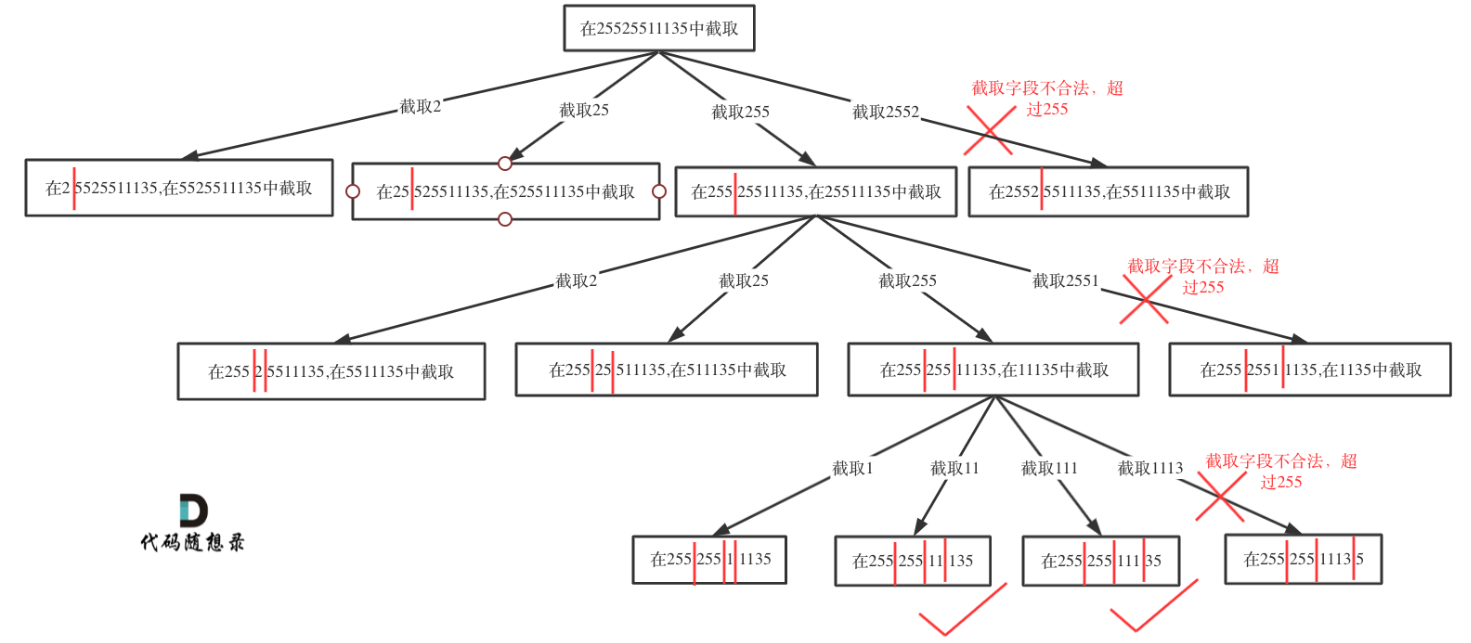
&nbsp;
- 时间复杂度: O(3^4)，IP地址最多包含4个数字，每个数字最多有3种可能的分割方式，则搜索树的最大深度为4，每个节点最多有3个子节点。
- 空间复杂度: O(n)

In [ ]:
# leetcode 93 - 复原IP地址
class Solution:
    def restoreIpAddresses(self, s: str) -> List[str]:
        def backtracking(s, start_idx, coma_num, current_ip, results):
            def valid_sub_ip(sub_ip):
                if len(sub_ip) <= 0:
                    return False
                if len(sub_ip) == 1:
                    return True
                if len(sub_ip) > 1:
                    for i in range(0, len(sub_ip)):
                        if sub_ip[i]=="0":
                            return False
                        else:
                            break
                    int_ip = int(sub_ip)
                    if int_ip < 0 or int_ip > 255:
                        return False
                    else:
                        return True

            if coma_num > 3:
                return 

            if coma_num == 3:
                sub_ip = s[start_idx: ]
                if valid_sub_ip(sub_ip):
                    current_ip += sub_ip
                    print(f"current_ip: {current_ip}")
                    results.append(current_ip[:])
                    return 

            for i in range(1, 4):
                sub_ip = s[start_idx: start_idx+i]
                if valid_sub_ip(sub_ip):
                    # print(f"sub_ip: {sub_ip}")
                    # print(f"current_ip: {current_ip}")
                    backtracking(s, start_idx+i, coma_num+1, current_ip+sub_ip+".", results)

        results = []
        backtracking(s, 0, 0, "", results)
        return results

### 子集问题 ###

- 回溯三部曲：
    - 递归函数的返回值以及参数：path存放子集，results存放子集集合，因为无重复所以需要start_idx
    - 递归终止条件：剩余集合为空（start_idx到最后）时即停止
    - 单层搜索的过程：因为需要遍历整棵树，因此不需要剪枝
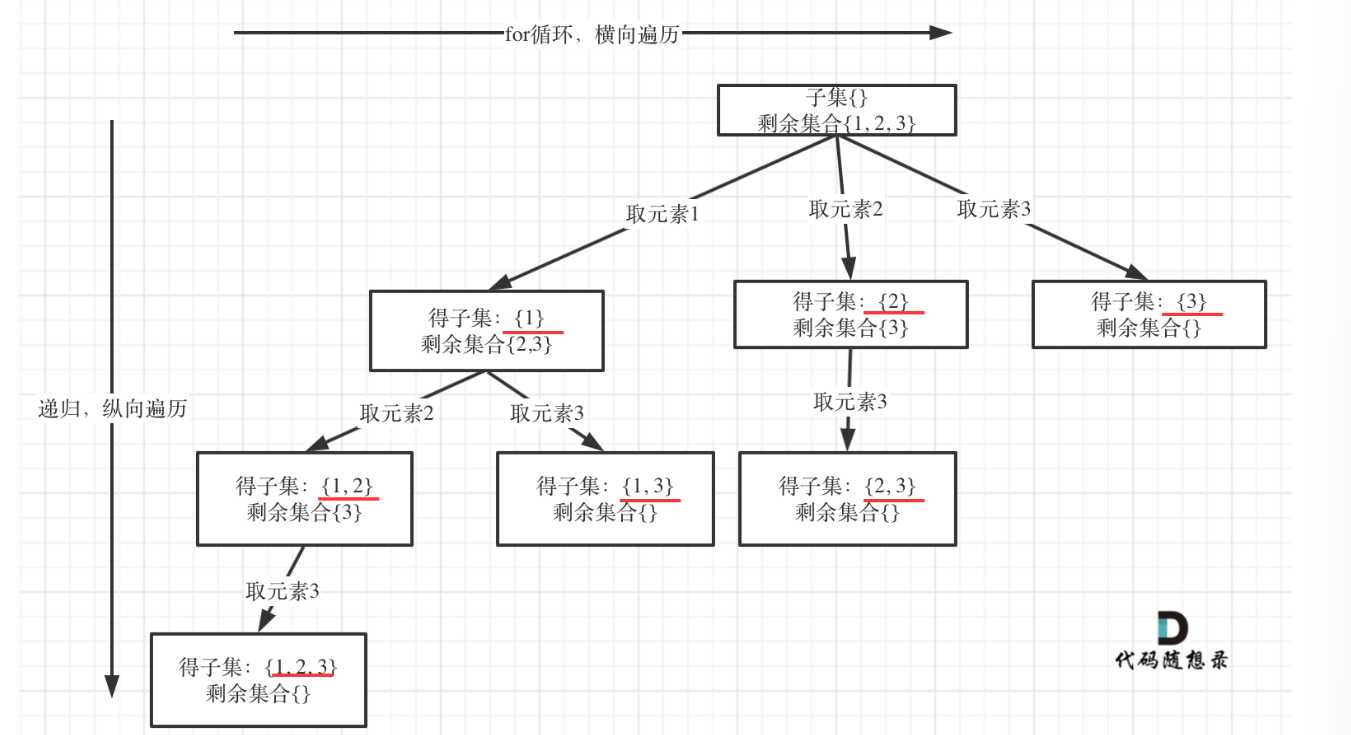
&nbsp;
- 变式：子集可能包含重复元素，但解集不能包含重复的子集
    - 注意：同层内不取重复的数；要去重需要先对集合排序
    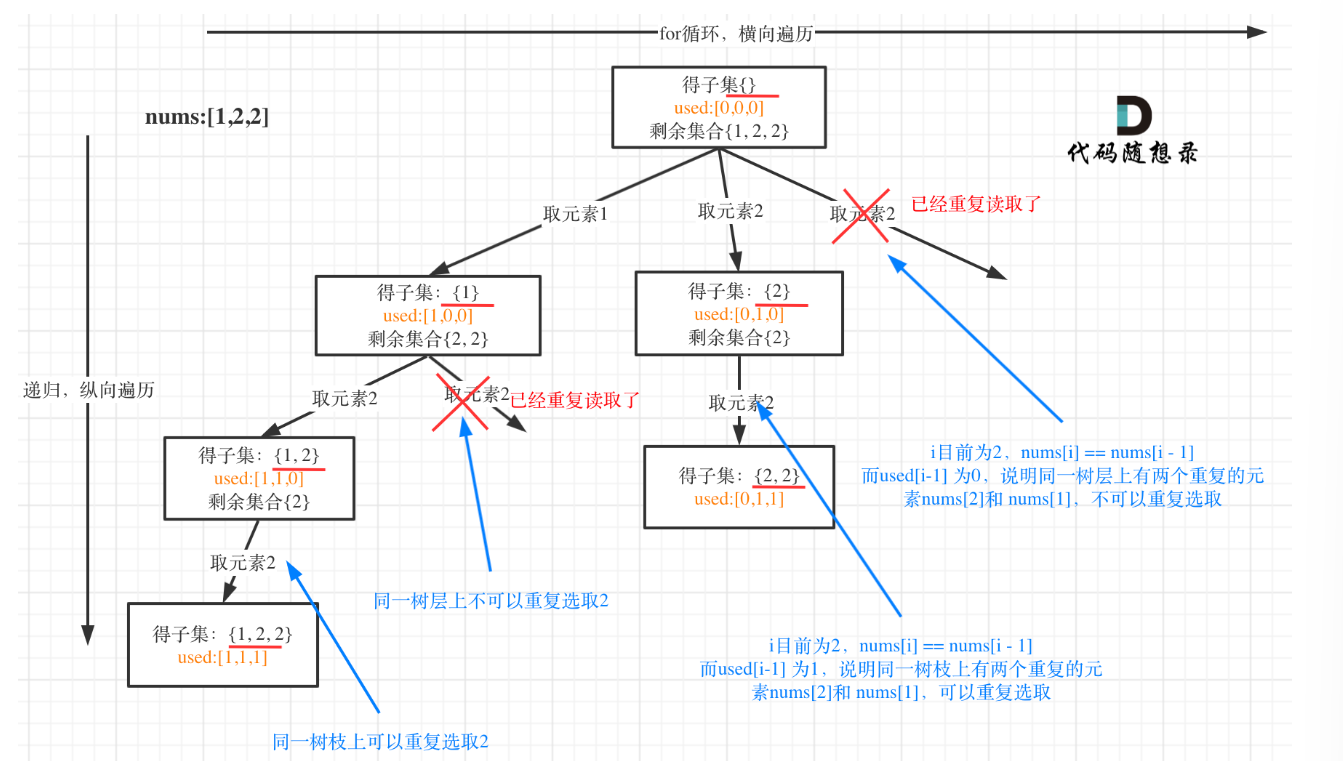

&nbsp;
- 时间复杂度: O(n * 2^n)
- 空间复杂度: O(n)

In [ ]:
# leetcode 78 - 子集
class Solution:
    def subsets(self, nums: List[int]) -> List[List[int]]:
        def backtracking(nums, start_idx, sub, results):
            # add to results in anyway
            results.append(sub[:])
            if start_idx >= len(nums):
                return 

            for i in range(start_idx, len(nums)):
                sub.append(nums[i])
                backtracking(nums, i+1, sub, results) # i+1 means not repeat the same number in different layer 
                sub.pop()
            
        results = []
        backtracking(nums, 0, [], results)
        return results

In [ ]:
# leetcode 90 - 子集Ⅱ
class Solution:
    def subsetsWithDup(self, nums: List[int]) -> List[List[int]]:
        def backtracking(nums, start_idx, sub, results):
            results.append(sub[:])
            # return condition
            if start_idx >= len(nums):
                return

            for i in range(start_idx, len(nums)):
                # remove same elements in the same layer
                if i>start_idx and nums[i] == nums[i-1]:
                    continue
                sub.append(nums[i])
                backtracking(nums, i+1, sub, results)
                sub.pop()

        results = []
        nums.sort() # sort before remove the same
        backtracking(nums, 0, [], results)
        return results
            

### 排列问题 ###

- 回溯三部曲：
    - 递归函数参数：排列时有序的，因此不需要考虑子树中重复用（例如1，3，2和1，2，3），因此无需start_idx；但需要used数组标记path中已选择的元素
    - 回溯终止条件：当path大小和nums一样大时结束
    - 单层搜索的过程：每次都从头开始，但是需要结合used进行过滤
    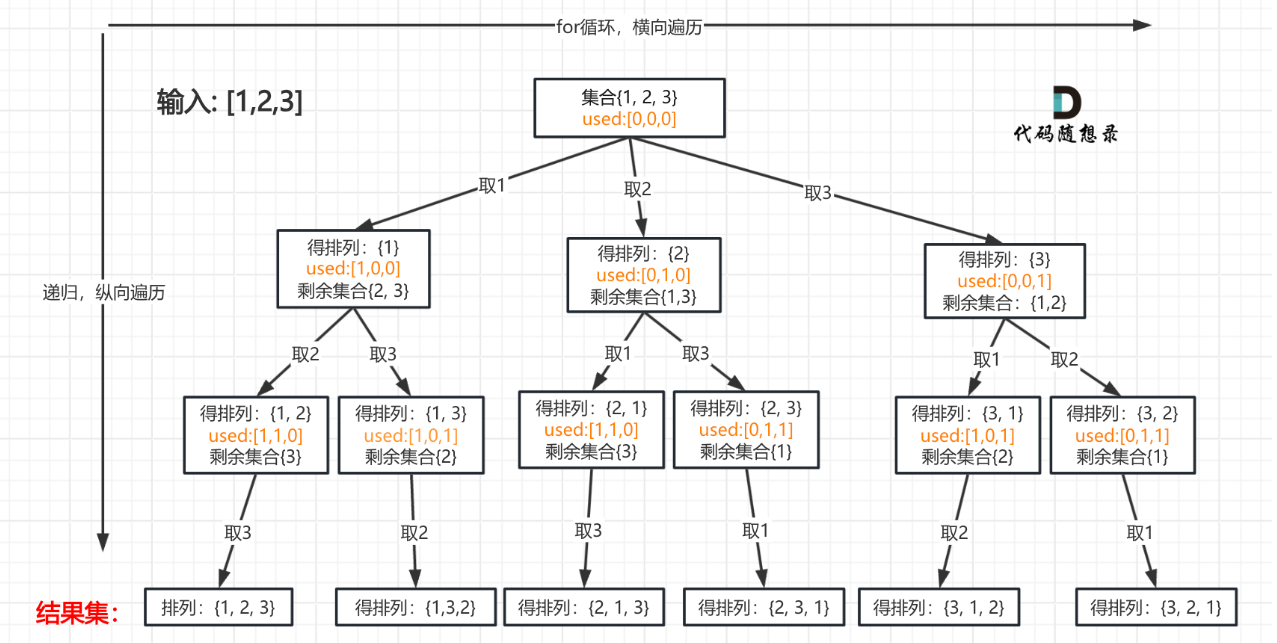
    - 备注：和可重复子集问题相比，只有单层搜索一处不同

- 变式：leetcode 47 - 在给定一个可包含重复数字的序列，要返回所有不重复的全排列。
    - 要点：排列、同层去重

&nbsp;
- 时间复杂度: O(n!)
- 空间复杂度: O(n)


In [1]:
# leetcode 46 - 全排列
class Solution:
    def permute(self, nums):
        result = []
        self.backtracking(nums, [], [False] * len(nums), result)
        return result

    def backtracking(self, nums, path, used, result):
        if len(path) == len(nums):
            result.append(path[:])
            return
        for i in range(len(nums)):
            if used[i]:
                continue
            used[i] = True
            path.append(nums[i])
            self.backtracking(nums, path, used, result)
            path.pop()
            used[i] = False


## 贪心算法 ##

- 贪心的本质是选择每一阶段的局部最优，从而达到全局最优。
    - 手动模拟一下感觉可以局部最优推出整体最优，而且想不到反例，那么就试一试贪心。

- 贪心解题步骤（但无固定模板）：
    1. 拆解问题为若干个子问题
    2. 找出适合的贪心策略
    3. 求解每个子问题的最优解
    4. 将局部最优解堆叠成全局最优解

In [ ]:
# leetcode 55 - 跳跃游戏
# 找每次覆盖范围，看是否可以达到终点
class Solution:
    def canJump(self, nums: List[int]) -> bool:
        max_jump = nums[0]
        total = len(nums)
        if max_jump >= total-1:
            return True
        
        for i in range(total):
            if i > max_jump:
                break
            max_jump = max(max_jump, i+nums[i])
            if max_jump >= total-1:
                return True
                
        return False

In [ ]:
# leetcode 376 - 摆动序列
# 画出摆动的折线图，考虑特殊情况例如持续平坦和单调递增

# 解法一：每次更新时才替换pre—_diff
class Solution:
    def wiggleMaxLength(self, nums: List[int]) -> int:
        # edge case: len <= 1
        if len(nums) <= 1:
            return 1

        # find turning point to calculate the length of longest wiggle
        result = 1
        pre_diff = 0
        curr_diff = 0
        for i in range(0, len(nums)-1):
            curr_diff = nums[i+1] - nums[i]
            # find turning point (exclude the flat sequence)
            if (curr_diff>0 and pre_diff<=0) or (curr_diff<0 and pre_diff>=0):
                result+=1
                # exclude the  turning point in the monotonically increasing, so only adjust the pre_diff when the peak is found, and could be compared to next sequence
                pre_diff = curr_diff
        
        return result
    
    
# 解法二：有一个sign来持续记录前次变化趋势
class Solution:
    def wiggleMaxLength(self, nums: List[int]) -> int:
        # edge case: len <= 1
        if len(nums) <= 1:
            return 1

        result = 1
        pre_diff = 0
        sign = 0  # 0 表示未确定，1 表示上升，-1 表示下降

        for i in range(len(nums)-1):
            curr_diff = nums[i+1] - nums[i]
            if curr_diff > 0 and (sign <= 0):
                result +=1
                sign = 1
                print(f"i:{i}, nums[i]:{nums[i]}, pre_diff:{pre_diff}, curr_diff:{curr_diff}")
            elif curr_diff < 0 and (sign >= 0):
                result +=1
                sign = -1
                print(f"i:{i}, nums[i]:{nums[i]}, pre_diff:{pre_diff}, curr_diff:{curr_diff}")
            # 如果 curr_diff == 0，不做任何操作
            pre_diff = curr_diff
        
        return result

### 多维度权衡（分糖果、升高排序） ###

- 分发糖果：
    1. 维度一：考虑右边比左边大（左往右遍历）
    2. 维度二：考虑左边比右边大（右往左遍历）

- 根据身高重建序列 （people[i] = (hi, ki)）
    1. 维度一：身高排序（大到小，同高则k小在前）
    2. 维度二：按照前面有几个高的要求进行插入（k）

In [ ]:
# leetcode 135 - 分发糖果
class Solution:
    def candy(self, ratings: List[int]) -> int:
        result = [1 for _ in range(len(ratings))]

        # iterate from left to right to judge if all match
        for i in range(len(ratings)-1):
            if ratings[i] < ratings[i+1]:
                result[i+1] = max(result[i+1], result[i])+1
        # print(result)
        
        # iterate from right to left to judge if all match (with result haven't been adjusted)
        for i in range(len(ratings)-1, 0, -1):
            if ratings[i-1] > ratings[i] and result[i-1] <= result[i]:
                result[i-1] = max(result[i-1], result[i])+1
        
        # print(result)
        return sum(result)

In [ ]:
# leetcode 406 -  根据身高重建队列
class Solution:
    def reconstructQueue(self, people: List[List[int]]) -> List[List[int]]:
        result = []
        # sorted by 2 keys: height(desc) + k(asc)
        sorted_people = sorted(people, key=lambda x: (-x[0],x[1]))

        for p in sorted_people:
            if p[1] == 0:
                result.insert(0, p)
            else:
                result.insert(p[1], p)

        return result

## 图论 ##

### 深度优先搜索（DFS） ###

- 深搜三部曲（DFS和回溯框架基本一致）：
    - 递归函数和参数
    - 终止条件
    - 处理当前搜索节点出发的路径

- 模板：
```python
void dfs(参数) {
    if (终止条件) {
        存放结果;
        return;
    }

    for (选择：本节点所连接的其他节点) {
        处理节点;
        dfs(图，选择的节点); // 递归
        回溯，撤销处理结果
    }
}
```

In [ ]:
# leetcode 200 - 岛屿数量
class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        def dfs(grid, visited, x, y):
            # return condition
            if visited[x][y] or grid[x][y] == "0":
                return 

            # mark visited
            visited[x][y] = True
            

            # traverse all directions
            for i, j in direction:
                next_x = x+i
                next_y = y+j
                if next_x < 0 or next_y < 0 or next_x >= len(grid) or next_y >= len(grid[0]):
                    continue
                dfs(grid, visited, next_x, next_y)

        result = 0 # number of islands
        visited = [[False] * len(grid[0]) for _ in range(len(grid))]
        direction = [[0, 1], [1, 0], [0, -1], [-1, 0]]

        # find the numbers of the new start of the land
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == "1" and not visited[i][j]:
                    result += 1
                    visited[i][j] = True
                    dfs(grid, visited, i, j)

        return result



### 广度优先搜索（BFS） ###

- 最适用问题：解决两个点之间的最短路径问题
- 圈式的搜索过程实现：
    - 队列：FIFO，统一一个方向进出保存遍历过的元素

- 模板（以四方图为例）：
```python
int dir[4][2] = {0, 1, 1, 0, -1, 0, 0, -1}; // 表示四个方向
// grid 是地图，也就是一个二维数组
// visited标记访问过的节点，不要重复访问
// x,y 表示开始搜索节点的下标
void bfs(vector<vector<char>>& grid, vector<vector<bool>>& visited, int x, int y) {
    queue<pair<int, int>> que; // 定义队列
    que.push({x, y}); // 起始节点加入队列
    visited[x][y] = true; // 只要加入队列，立刻标记为访问过的节点
    while(!que.empty()) { // 开始遍历队列里的元素
        pair<int ,int> cur = que.front(); que.pop(); // 从队列取元素
        int curx = cur.first;
        int cury = cur.second; // 当前节点坐标
        for (int i = 0; i < 4; i++) { // 开始想当前节点的四个方向左右上下去遍历
            int nextx = curx + dir[i][0];
            int nexty = cury + dir[i][1]; // 获取周边四个方向的坐标
            if (nextx < 0 || nextx >= grid.size() || nexty < 0 || nexty >= grid[0].size()) continue;  // 坐标越界了，直接跳过
            if (!visited[nextx][nexty]) { // 如果节点没被访问过
                que.push({nextx, nexty});  // 队列添加该节点为下一轮要遍历的节点
                visited[nextx][nexty] = true; // 只要加入队列立刻标记，避免重复访问
            }
        }
    }

}
```

In [ ]:
# leetcode 200 - 岛屿数量
from collections import deque

class Solution:
    def numIslands(self, grid: List[List[str]]) -> int:
        def bfs(grid, visited, x, y):
            queue = deque([])
            queue.append([x,y])
            while queue:
                curr_x, curr_y = queue.popleft()
                for i, j in direction:
                    next_x = curr_x + i
                    next_y = curr_y + j
                    if next_x < 0 or next_y < 0 or next_x >= len(grid) or next_y >= len(grid[0]):
                        continue
                    if not visited[next_x][next_y] and grid[next_x][next_y] == 1:
                        visited[next_x][next_y] = True
                        queue.append([next_x, next_y])
                           

          
        result = 0 # number of islands
        visited = [[False] * len(grid[0]) for _ in range(len(grid))]
        direction = [[0, 1], [1, 0], [0, -1], [-1, 0]]

        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == 1 and not visited[i][j]:
                    result += 1
                    bfs(grid, visited, i, j)

        return result



## 数学 ##

In [ ]:
# leetcode 205 - 计数质数：https://labuladong.online/algo/frequency-interview/print-prime-number/#%E9%AB%98%E6%95%88%E5%AE%9E%E7%8E%B0-countprimes
class Solution:
    def countPrimes(self, n: int) -> int:        
        # edge cases: 0, 1
        if n <= 2:
            return 0

        prime_table = [1 for _ in range(n)] # idx represents the number
        for i in range(2, int(math.sqrt(n))+1):
            if prime_table[i] == 1:
                for j in range(2*i,n,i): # multiples of the prime are not primes
                    prime_table[j] = 0   
        
        # print(prime_table)
        return sum(prime_table[2:n])